In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
np.random.seed(11)

# Data Import Section

In [2]:
df = pd.read_csv('heart_2020_cleaned.csv')

In [3]:
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# EDA - Note: extra EDA included in this notebook, use write-up to see useful/most important EDA

### HeatMap

In [4]:
data = pd.read_csv("heart_2020_cleaned.csv")
data = data.replace({'Yes': 1, 'No': 0})
data = data.replace({'Male': 1, 'Female': 0})
new_data = data.replace({"Yes": 1, "No": 0})
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,55-59,White,1,1,Very good,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,80 or older,White,0,1,Very good,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,65-69,White,1,1,Fair,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,75-79,White,0,0,Good,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,40-44,White,0,1,Very good,8.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,1,27.41,1,0,0,7.0,0.0,1,1,60-64,Hispanic,1,0,Fair,6.0,1,0,0
319791,0,29.84,1,0,0,0.0,0.0,0,1,35-39,Hispanic,0,1,Very good,5.0,1,0,0
319792,0,24.24,0,0,0,0.0,0.0,0,0,45-49,Hispanic,0,1,Good,6.0,0,0,0
319793,0,32.81,0,0,0,0.0,0.0,0,0,25-29,Hispanic,0,0,Good,12.0,0,0,0


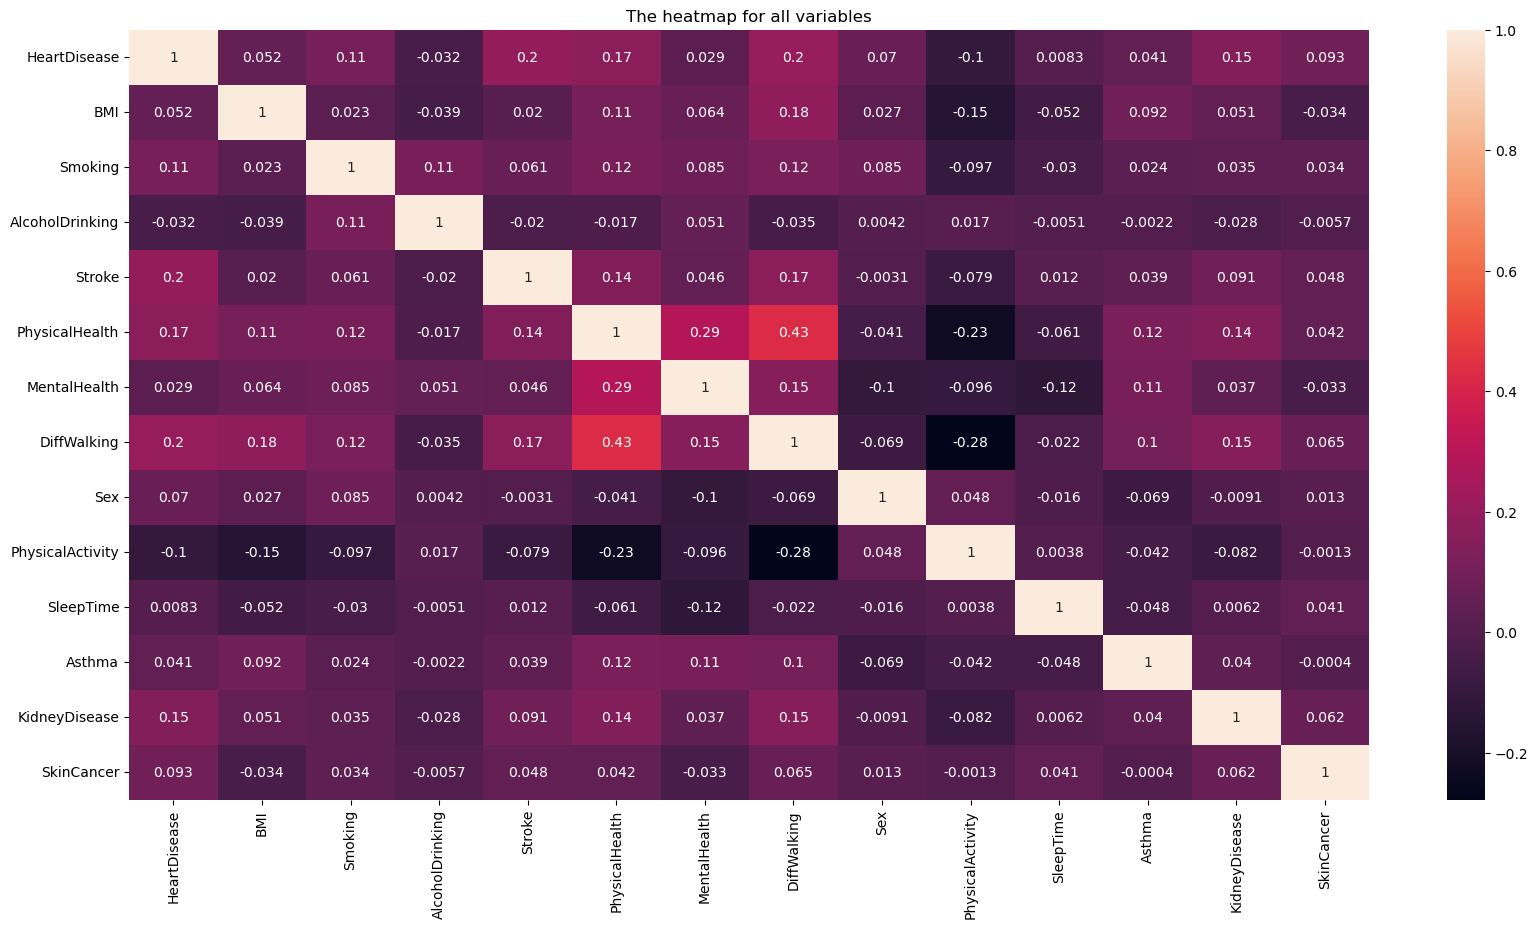

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
heat = data.select_dtypes(include="number").corr()
sns.heatmap(heat, xticklabels=heat.columns, yticklabels=heat.columns,annot=True)
ax.set_title('The heatmap for all variables');

### Sleep Time and Alcohol Drinking Status

In [6]:
#Function for plotting the distribution of numerical variables based on categorical variables
def num_cat_compare_distribution(num, cat, data):
    selected = data[[num, cat]]
    plt.hist(selected[selected[cat] == 1][[num]], density = True, 
         ec = "w", alpha = 0.5, bins = np.arange(0,24,1));
    plt.hist(selected[selected[cat] == 0][[num]], density = True, 
         ec = "w", alpha = 0.5, bins = np.arange(0,24,1));


    median_diff = np.median(selected[selected[cat] == 1][num]) - np.median(selected[selected[cat] == 0][num])
    mean_diff = np.mean(selected[selected[cat] == 1][num]) - np.mean(selected[selected[cat] == 0][num])
    return [median_diff, mean_diff]

For the second research question, we are interested are looking for potential confounders in the causal relationship between sleep time and heart disease. The visualization below shows the distribution of one's sleep time (defined as the average amount of sleep measured in hours an individual get during a 24-hour period) given one's alcohol drinking status (categorizing one as a heavy drinkers if they are either an adult men having more than 14 drinks per week or ann adult women having more than 7 drinks per week). According to the visualization, there seems to be a slight difference, between the distribution of sleep time of frequent drinkers and non-frequent drinkers, with both groups having their mean around the 8-9 hours range. Differences such as this motivated us to conduct further research for credible resources online to determine whether certain variables may be considered a potential confounder for the causal inference part of the research.

Text(0.5, 1.0, 'Distribution of Sleep Time based on Alcohol Drinking Status')

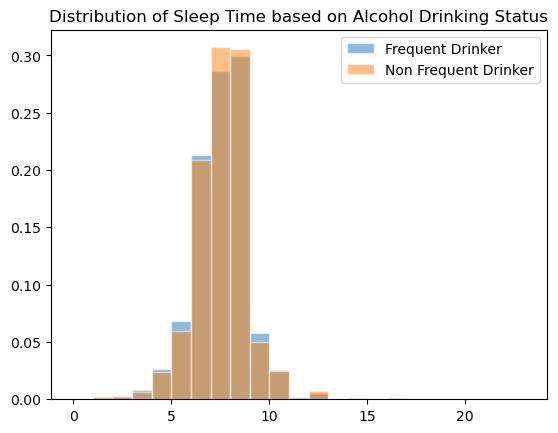

In [7]:
num_cat_compare_distribution("SleepTime", "AlcoholDrinking", new_data)
labels = ["Frequent Drinker","Non Frequent Drinker"]
plt.legend(labels)
plt.title("Distribution of Sleep Time based on Alcohol Drinking Status")

### Age Category and Sleep Time

In [8]:
def num_cat_compare_distribution2(num, cat):
    selected = data[[num, cat]]
    plt.hist(selected[selected[cat] == 1][[num]], density = True, 
         ec = "w", alpha = 0.5, bins = np.arange(0,24,1));
    plt.hist(selected[selected[cat] == 0][[num]], density = True, 
         ec = "w", alpha = 0.5, bins = np.arange(0,24,1));
    labels= ["categorical variable = 1","categorical variable = 0"]
    
    plt.legend(labels)

    median_diff = np.median(selected[selected[cat] == 1][num]) - np.median(selected[selected[cat] == 0][num])
    mean_diff = np.mean(selected[selected[cat] == 1][num]) - np.mean(selected[selected[cat] == 0][num])
    return [median_diff, mean_diff]

def find_averages(series_name, df, other_name):

    averages =  []
    values = []
    for i in df[series_name].value_counts().index.sort_values():
        values.append(i)
        averages.append(np.mean(df[df[series_name]==i][other_name]))
    return averages, values

def plot_var_against_average(series_name, df, other_name):
    a, v = find_averages(series_name, df, other_name)
    plt.scatter(v, a)

Text(0.5, 1.0, 'Age Category vs Sleep Time')

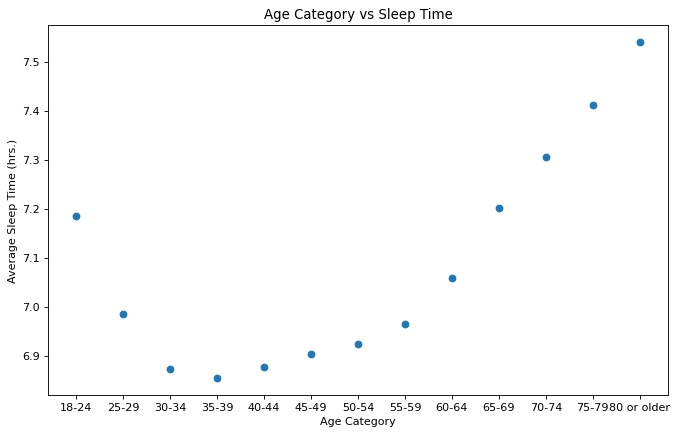

In [9]:
from matplotlib.pyplot import figure

figure(figsize=(10, 6), dpi=80)
plot_var_against_average('AgeCategory',data, 'SleepTime')
plt.ylabel('Average Sleep Time (hrs.)')
plt.xlabel('Age Category')
plt.title('Age Category vs Sleep Time')

### Sleep Time for Those With and Without Difficulty Walking

Text(0, 0.5, 'density')

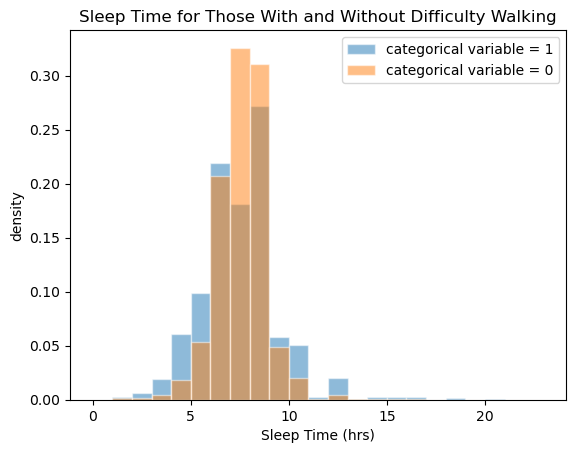

In [10]:
num_cat_compare_distribution2('SleepTime','DiffWalking')
plt.title('Sleep Time for Those With and Without Difficulty Walking')
plt.xlabel('Sleep Time (hrs)')
plt.ylabel('density')

### Sleep Time for Those With and Without Heart Disease

Text(0, 0.5, 'density')

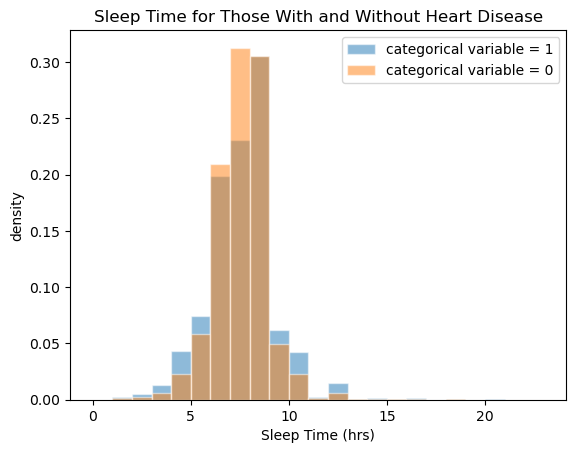

In [11]:
#relationship between sleep and heart disease (what we are looking for)
num_cat_compare_distribution2('SleepTime', 'HeartDisease')
plt.title('Sleep Time for Those With and Without Heart Disease')
plt.xlabel('Sleep Time (hrs)')
plt.ylabel('density')

### Sleep Time and Alcohol Drinking Status (done again to test different methods)

Text(0, 0.5, 'density')

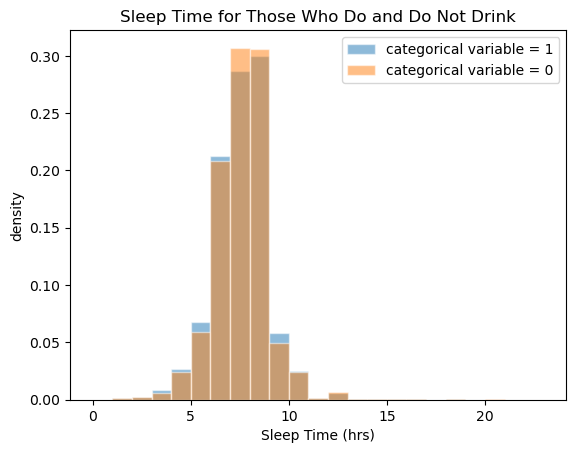

In [12]:
#looking for confounding variables 
num_cat_compare_distribution2("SleepTime","AlcoholDrinking")
plt.title('Sleep Time for Those Who Do and Do Not Drink')
plt.xlabel('Sleep Time (hrs)')
plt.ylabel('density')

### Asthma Status and Mental Health

Text(0.5, 1.0, 'Box Plot of Asthma Status and Mental Health')

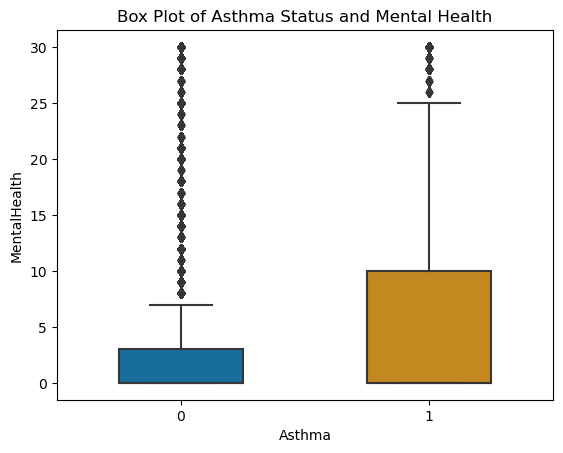

In [13]:
sns.boxplot(y='MentalHealth', x='Asthma', data=data, width=0.5,palette="colorblind")
plt.title('Box Plot of Asthma Status and Mental Health')

### Mental Health and Physical Health

Text(0.5, 1.0, 'Mental Health vs Average Physical Health')

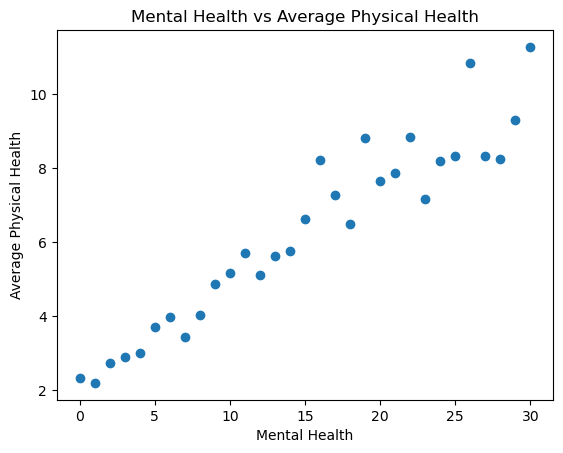

In [14]:
plot_var_against_average('MentalHealth', df, 'PhysicalHealth')
plt.ylabel('Average Physical Health')
plt.xlabel('Mental Health')
plt.title('Mental Health vs Average Physical Health')

In [15]:
np.corrcoef(df['MentalHealth'], df['PhysicalHealth'])

array([[1.        , 0.28798667],
       [0.28798667, 1.        ]])

### Physical Activity and Sleep Time

In [16]:
df['PhysicalActivityInt'] = (df['PhysicalActivity']=='Yes').astype(int)

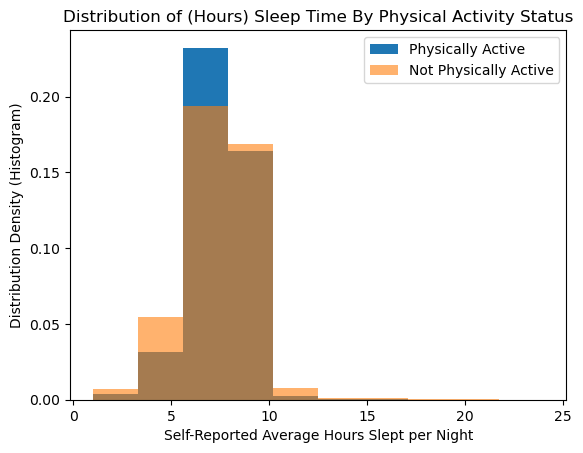

In [17]:
labels2 = ['Physically Active', 'Not Physically Active']
plt.hist(df[df['PhysicalActivity']=='Yes']['SleepTime'], density=True)
plt.hist(df[df['PhysicalActivity']=='No']['SleepTime'], density=True, alpha = .6)
plt.title('Distribution of (Hours) Sleep Time By Physical Activity Status')
plt.xlabel('Self-Reported Average Hours Slept per Night')
plt.ylabel('Distribution Density (Histogram)')
plt.legend(labels2)

In [18]:
np.corrcoef(df['PhysicalActivityInt'], df['SleepTime'])

array([[1.        , 0.00384884],
       [0.00384884, 1.        ]])

Text(0.5, 1.0, 'Sleep Time vs Average Physical Activity Status')

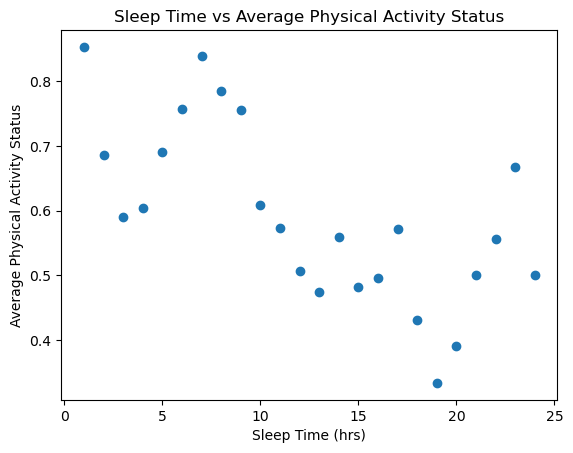

In [19]:
plot_var_against_average('SleepTime', df, 'PhysicalActivityInt')
plt.xlabel('Sleep Time (hrs)')
plt.ylabel('Average Physical Activity Status')
plt.title('Sleep Time vs Average Physical Activity Status')

### Physical Activity & Mental Health

Text(0.5, 1.0, 'Mental Health vs Average Physical Activity Status')

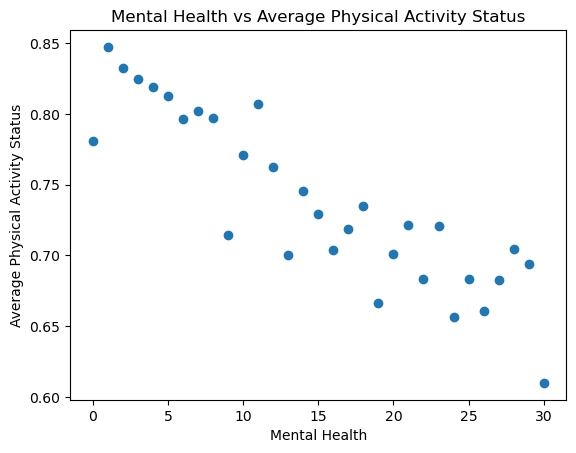

In [20]:
plot_var_against_average('MentalHealth', df, 'PhysicalActivityInt')
plt.xlabel('Mental Health')
plt.ylabel('Average Physical Activity Status')
plt.title('Mental Health vs Average Physical Activity Status')

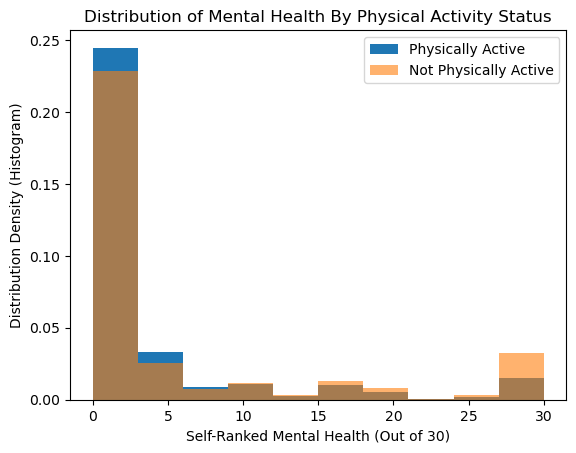

In [21]:
labels = ['Physically Active', 'Not Physically Active']
plt.hist(df[df['PhysicalActivity']=='Yes']['MentalHealth'], density=True)
plt.hist(df[df['PhysicalActivity']=='No']['MentalHealth'], density=True, alpha = .6)
plt.title('Distribution of Mental Health By Physical Activity Status')
plt.xlabel('Self-Ranked Mental Health (Out of 30)')
plt.ylabel('Distribution Density (Histogram)')
plt.legend(labels)

In [22]:
np.corrcoef(df['MentalHealth'],df['PhysicalActivityInt'])

array([[ 1.       , -0.0958081],
       [-0.0958081,  1.       ]])

### Sleep Time and Mental Health

Text(0.5, 1.0, 'Average Mental Health vs Sleep Time')

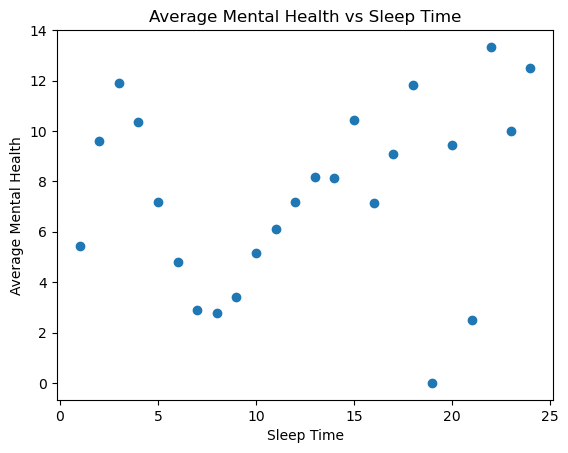

In [23]:
plot_var_against_average('SleepTime',df,'MentalHealth')
plt.xlabel('Sleep Time')
plt.ylabel('Average Mental Health')
plt.title('Average Mental Health vs Sleep Time')

# Multiple Hypothesis Testing 

### Functions to shuffle labels and generate a list of differences for the simulated test statistic

In [24]:
def one_shuffle_and_dif(table, label, shuffle_label, possible_value1, possible_value2):
    shuffled_labels = table[shuffle_label].sample(n=len(table[shuffle_label]), replace=True)
    table['shuffled'] = shuffled_labels.reset_index()[shuffle_label]
    difference = np.mean(table[table['shuffled']==possible_value1][label]) - np.mean(table[table['shuffled']==possible_value2][label])
    return difference

In [25]:
one_shuffle_and_dif(df, 'BMI', 'Sex', 'Female', 'Male')

0.037921402423272355

In [26]:
def permutation_test(n, table, label, shuffle_label, possible_value1, possible_value2):
    diffs = []
    for i in range(n):
        diffs.append(one_shuffle_and_dif(table, label, shuffle_label, possible_value1, possible_value2))
    return diffs

In [27]:
permutation_test(2, df, 'BMI', 'Sex', 'Female', 'Male')

[0.008309978177344135, 0.025059480718397253]

Function to calculate naive p-values for the actual test statistic among the simulated data

In [28]:
def calc_naive_p(actual_val, perm_results):
    return len([x for x in perm_results if abs(x)>=abs(actual_val)]) / len(perm_results)

### Creating a sleep-amount cutoff per what is healthy and what is not (CDC guidance - see matching section for more details). Variable "High_Sleep" is a boolean with 1 for 7 or more hours of sleep (healthy)

In [29]:
df['High_Sleep'] = (df['SleepTime']>=7)



df.loc[(df["AgeCategory"] == '18-24') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '18-24') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '25-29') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '25-29') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '30-34') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '30-34') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '35-39') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '35-39') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '40-44') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '40-44') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '45-49') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '45-49') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '50-54') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '50-54') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '55-59') & (df["SleepTime"] < 7), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '55-59') & (df["SleepTime"] >= 7), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '60-64') & (df["SleepTime"] < 7) | (df["SleepTime"] > 9), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '60-64') & (df["SleepTime"] >= 7) & (df["SleepTime"] <= 9), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '65-69') & (df["SleepTime"] < 7) | (df["SleepTime"] > 8), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '65-69') & (df["SleepTime"] >= 7) & (df["SleepTime"] <= 8), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '70-74') & (df["SleepTime"] < 7) | (df["SleepTime"] > 8), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '70-74') & (df["SleepTime"] >= 7) & (df["SleepTime"] <= 8), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '75-79') & (df["SleepTime"] < 7) | (df["SleepTime"] > 8), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '75-79') & (df["SleepTime"] >= 7) & (df["SleepTime"] <= 8), "High_Sleep"] = 0

df.loc[(df["AgeCategory"] == '80 or older') & (df["SleepTime"] < 7) | (df["SleepTime"] > 8), "High_Sleep"] = 1
df.loc[(df["AgeCategory"] == '80 or older') & (df["SleepTime"] >= 7) & (df["SleepTime"] <= 8), "High_Sleep"] = 0

df

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,PhysicalActivityInt,shuffled,High_Sleep
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,...,Yes,Yes,Very good,5.0,Yes,No,Yes,1,Female,1
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,...,No,Yes,Very good,7.0,No,No,No,1,Female,0
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,...,Yes,Yes,Fair,8.0,Yes,No,No,1,Male,0
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,...,No,No,Good,6.0,No,No,Yes,0,Male,1
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,...,No,Yes,Very good,8.0,No,No,No,1,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,...,Yes,No,Fair,6.0,Yes,No,No,0,Female,1
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,...,No,Yes,Very good,5.0,Yes,No,No,1,Female,1
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,...,No,Yes,Good,6.0,No,No,No,1,Female,1
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,...,No,No,Good,12.0,No,No,No,0,Male,1


Function that runs the full AB test and returns the p_vals for a passed-in pair of variables

In [30]:
def run_full_test(alpha, number_permutations, df, num_var, cat_var, poss_1, poss_2):
    results = []
    actual_dif = np.mean(df[df[cat_var]==poss_1][num_var]) - np.mean(df[df[cat_var]==poss_2][num_var])
    perm_diffs = permutation_test(number_permutations, df, num_var, cat_var, poss_1, poss_2)
    results.append(calc_naive_p(actual_dif, perm_diffs))
    return results


### The following section is for running the test on all of the desired categorical and numerical variable pairs:

(Numerical) and (Categorical)

Mental Health and High Sleep (categorical constructed from numerical "Sleep Time" above)

Sleep Time and Alcohol Drinker

Mental Health and Alcohol Drinker

Sleep Time and Physical Activity Status

Mental Health and Physical Activity Status

Mental Health and Asthma Status

Sleep Time and Asthma Status

### Note: permutations are only run 400 times due to kernal crashing at higher number of permutations

In [31]:
result_p_vals = []
test = []

In [32]:
result_p_vals.append(run_full_test(.05, 400, df, 'MentalHealth', 'High_Sleep', 'True','False')[0])
test.append('Mental Health and High Sleep')

In [33]:
result_p_vals.append(run_full_test(.05, 400, df, 'SleepTime', 'AlcoholDrinking', 'Yes','No')[0])
test.append('Sleep Time and Alcohol Drinking')

In [34]:
result_p_vals.append(run_full_test(.05, 400, df, 'MentalHealth', 'AlcoholDrinking', 'Yes','No')[0])
test.append('Mental Health and Alcohol Drinking')

In [35]:
result_p_vals.append(run_full_test(.05, 400, df, 'SleepTime', 'PhysicalActivityInt', 1,0)[0])
test.append('Sleep Time and Physical Activity')

In [36]:
result_p_vals.append(run_full_test(.05, 400, df, 'MentalHealth', 'PhysicalActivityInt', 1,0)[0])
test.append('Mental Health and Physical Activity')

In [37]:
result_p_vals.append(run_full_test(.05, 400, df, 'MentalHealth', 'Asthma', 'Yes', 'No')[0])
test.append('Mental Health and Asthma')

In [38]:
result_p_vals.append(run_full_test(.05, 400, df, 'SleepTime', 'Asthma', 'Yes', 'No')[0])
test.append('Sleep Time and Asthma')

In [39]:
df_new2 = pd.DataFrame()
df_new2['p_vals'] = result_p_vals
df_new2['test'] = test
df_new2

,p_vals,test
0,0.0000,Mental Health and High Sleep
1,0.0075,Sleep Time and Alcohol Drinking
2,0.0000,Mental Health and Alcohol Drinking
3,0.0325,Sleep Time and Physical Activity
4,0.0000,Mental Health and Physical Activity
5,0.0000,Mental Health and Asthma
6,0.0000,Sleep Time and Asthma


In [40]:
#bonferoni correction helper
def calc_bonferoni_decisions(alpha, p_vals):
    #output - array of results indicating 1: reject null 0: keep null
    decisions = []
    for i in p_vals:
        if (i > (alpha / len(p_vals))):
            decisions.append(0)
        else:
            decisions.append(1)
    return decisions

In [41]:
#bh correction helper
def bh_decisions(alpha, p_vals):
    #outputs array of results indiciating 1: reject null 0: keep null
    n = len(p_vals)
    df2 = pd.DataFrame()
    df2['p_vals'] = p_vals
    df2 = df2.sort_values(by='p_vals')
    max_k = max([k for k in range(n) if df2['p_vals'][k] <= (k+1) *(alpha/n)])
    threshold = df2['p_vals'][max_k]
    decisions = []
    for i in p_vals:
        if (i > threshold):
            decisions.append(0)
        else:
            decisions.append(1)
    return decisions


In [42]:
df_new2['bon_decisions'] = calc_bonferoni_decisions(.05, df_new2['p_vals'])
df_new2['bh_decisions'] = bh_decisions(.05, df_new2['p_vals'])
df_new2['naive_decisions'] = (df_new2['p_vals'] <= .05) * 1

In [43]:
df_new2

,p_vals,test,bon_decisions,bh_decisions,naive_decisions
0,0.0000,Mental Health and High Sleep,1,1,1
1,0.0075,Sleep Time and Alcohol Drinking,0,0,1
2,0.0000,Mental Health and Alcohol Drinking,1,1,1
3,0.0325,Sleep Time and Physical Activity,0,0,1
4,0.0000,Mental Health and Physical Activity,1,1,1
5,0.0000,Mental Health and Asthma,1,1,1
6,0.0000,Sleep Time and Asthma,1,1,1


# Causal Inference

## Instrumental Variables

outcome = HeartDisease, treatment = SleepTime, instrumental variable = PhysicalHealth	

using instrumental variable for regression for the whole dataset:

In [44]:
Z = data['SleepTime']
W = data['PhysicalHealth']
W = sm.add_constant(W)
model = sm.OLS(Z,W)
gamma1_model = model.fit()
print(gamma1_model.summary())

                            OLS Regression Results                            
Dep. Variable:              SleepTime   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1210.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):          1.54e-264
Time:                        20:24:18   Log-Likelihood:            -5.6889e+05
No. Observations:              319795   AIC:                         1.138e+06
Df Residuals:                  319793   BIC:                         1.138e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              7.1345      0.003   2591.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [45]:
intercept_OLS = gamma1_model.params[0]
gamma1_OLS = gamma1_model.params[1]
Z_hat = intercept_OLS + gamma1_OLS*data['PhysicalHealth']

Y = data['HeartDisease']
Z_hat = sm.add_constant(Z_hat)
model = sm.OLS(Y,Z_hat)
beta1_model = model.fit()
print(beta1_model.summary())

                            OLS Regression Results                            
Dep. Variable:           HeartDisease   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     9600.
Date:                Mon, 12 Dec 2022   Prob (F-statistic):               0.00
Time:                        20:24:18   Log-Likelihood:                -41684.
No. Observations:              319795   AIC:                         8.337e+04
Df Residuals:                  319793   BIC:                         8.339e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              3.9309      0.039    100.

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


The result above has test statistic of -97.982, which indicates statistical significance. That is, the regression indicates a negative causal relationship between sleep and heart disease. More specifically, the more sleep one has, the less chance he will have a heart disease. 

Then, we are curious about the effect magnitude difference among different age group. Thus, we run the regression with instrumental variable (2SLS) with selected age group, then compare the coeffecient resulted. 

In [46]:
coefs = []
for age in np.sort(data['AgeCategory'].unique()):
    data_selected = data[data['AgeCategory'] == age]
    
    #first regression 
    Z = data_selected['SleepTime']
    W = data_selected['PhysicalHealth']
    W = sm.add_constant(W)
    model = sm.OLS(Z,W)
    gamma1_model = model.fit()
    
    #second regression
    intercept_OLS = gamma1_model.params[0]
    gamma1_OLS = gamma1_model.params[1]
    Z_hat = intercept_OLS + gamma1_OLS*data_selected['PhysicalHealth']
    Y = data_selected['HeartDisease']
    Z_hat = sm.add_constant(Z_hat)
    model = sm.OLS(Y,Z_hat)
    beta1_model = model.fit()
    
    #append the coeffecient
    coefs.append(beta1_model.params[1])

/opt/conda/lib/python3.9/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [47]:
d = {"Age Group":np.sort(data['AgeCategory'].unique()), "Coeffecients": coefs}
print(pd.DataFrame(d))

      Age Group  Coeffecients
0         18-24     -0.053572
1         25-29     -0.045253
2         30-34     -0.061575
3         35-39     -0.089865
4         40-44     -0.170802
5         45-49     -0.197462
6         50-54     -0.258853
7         55-59     -0.330907
8         60-64     -0.404624
9         65-69     -0.463205
10        70-74     -0.755524
11        75-79    -61.090220
12  80 or older     -7.295324


Text(0.5, 1.0, 'The casuality coeffecients for people younger than 75')

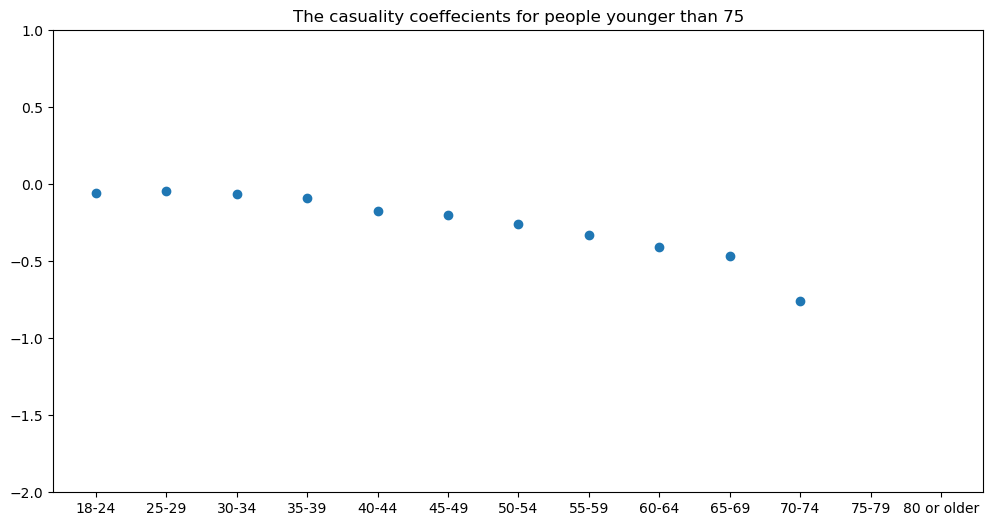

In [48]:
plt.figure(figsize = (12, 6))
plt.scatter(x = np.sort(data['AgeCategory'].unique()), y = coefs)
plt.ylim([-2,1])
plt.title("The casuality coeffecients for people younger than 75")

From both the dataframe and the visualization, first we can see that this "more sleep, less heart disease" casual relationship still exists across all age group (all coeffecients are below 0). Secondly, there exists a decreasing trend for all coeffecients. That is, this effect is less significant for younger people and more significant for older people, especially for two age groups: 75-79 & 80 and older

## Matching

In [49]:
data = pd.read_csv("heart_2020_cleaned.csv")
data

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


First, we have decided to use matching to research the causal relationship between sleep time and heart disease. Through preliminary research, we have determined that there are 6 confounding variables that would impact this relationship. We first visualized the distribution number of people that have similar confounding conditions as the following:

In [50]:
trim_data = data[["HeartDisease", "SleepTime", "BMI", "Smoking", "AlcoholDrinking", "AgeCategory", "Diabetic", "Asthma"]]
trim_data

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
0,No,5.0,16.60,Yes,No,55-59,Yes,Yes
1,No,7.0,20.34,No,No,80 or older,No,No
2,No,8.0,26.58,Yes,No,65-69,Yes,Yes
3,No,6.0,24.21,No,No,75-79,No,No
4,No,8.0,23.71,No,No,40-44,No,No
...,...,...,...,...,...,...,...,...
319790,Yes,6.0,27.41,Yes,No,60-64,Yes,Yes
319791,No,5.0,29.84,Yes,No,35-39,No,Yes
319792,No,6.0,24.24,No,No,45-49,No,No
319793,No,12.0,32.81,No,No,25-29,No,No


We first did some basic EDAs to change "Yes" and "No" to be numerically represented as 1, and 0, respectively.

In [51]:
trim_data = trim_data.replace({"No": 0, "Yes": 1})
trim_data

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
0,0,5.0,16.60,1,0,55-59,1,1
1,0,7.0,20.34,0,0,80 or older,0,0
2,0,8.0,26.58,1,0,65-69,1,1
3,0,6.0,24.21,0,0,75-79,0,0
4,0,8.0,23.71,0,0,40-44,0,0
...,...,...,...,...,...,...,...,...
319790,1,6.0,27.41,1,0,60-64,1,1
319791,0,5.0,29.84,1,0,35-39,0,1
319792,0,6.0,24.24,0,0,45-49,0,0
319793,0,12.0,32.81,0,0,25-29,0,0


We have also converted the BMI data given in the dataset from a numerical variable into a categorical variable. This guarantees that there won't be too many units in the dataset without a match of their exact BMI, making the results of matching with too much inaccuracy. We have converted the BMI data with the following criteria: Category 1: $BMI\leq18.5$ ; Category 2: $18.5\leq BMI\leq24.9$; Category 3: $25\leq BMI\leq29.9$; Category 4: $BMI\leq30$

In [52]:
#change the BMI categories
trim_data.loc[trim_data["BMI"] < 18.5 , "BMI"] = 1
trim_data.loc[(trim_data["BMI"] >= 18.5) & (trim_data["BMI"] <= 24.9), "BMI"] = 2
trim_data.loc[(trim_data["BMI"] >= 25) & (trim_data["BMI"] <= 29.9), "BMI"] = 3
trim_data.loc[(trim_data["BMI"] >= 30), "BMI"] = 4

#change sleep to 1 / 0
trim_data

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
0,0,5.0,1.0,1,0,55-59,1,1
1,0,7.0,2.0,0,0,80 or older,0,0
2,0,8.0,3.0,1,0,65-69,1,1
3,0,6.0,2.0,0,0,75-79,0,0
4,0,8.0,2.0,0,0,40-44,0,0
...,...,...,...,...,...,...,...,...
319790,1,6.0,3.0,1,0,60-64,1,1
319791,0,5.0,3.0,1,0,35-39,0,1
319792,0,6.0,2.0,0,0,45-49,0,0
319793,0,12.0,4.0,0,0,25-29,0,0


In order to divide the dataset into two categories -- those who were untreated and those who were treated -- for matching, we have converted SleepTime, originally a numerical variable, into a categorical variable. We achieved such conversion through the official guidelines of the appropriate sleep time given age groups provided by the CDC. For example, the CDC recommended that the appropriate sleep time for the age group 18 - 24 to be at least 7 hours. We would therefore mark those who are in the 18 - 24 age group and sleep less than 7 hours (don't have appropriate sleep time) to be "treated" (1), and those who sleep more than 7 hours within the age group to be "untreated" (0). The reason that we chose those whose sleep time does not match the amount recommended by CDC to be the treated group and hence marked as "1" is because, by common sense, we deem those who have worse sleep quality more likely to get heart disease. Thus, the estimated ATE will be positive if people who have worse sleeping times with the same confounding conditions have more heart disease cases among them. We constructed the following function to select units from those who were treated and those who weren't with similar confounding conditions. The procedure to recode the data as shown as the following:

In [53]:
trim_data["AgeCategory"].unique()

array(['55-59', '80 or older', '65-69', '75-79', '40-44', '70-74',
       '60-64', '50-54', '45-49', '18-24', '35-39', '30-34', '25-29'],
      dtype=object)

In [54]:
trim_data.loc[(trim_data["AgeCategory"] == '18-24') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '18-24') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '25-29') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '25-29') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '30-34') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '30-34') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '35-39') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '35-39') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '40-44') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '40-44') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '45-49') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '45-49') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '50-54') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '50-54') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '55-59') & (trim_data["SleepTime"] < 7), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '55-59') & (trim_data["SleepTime"] >= 7), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '60-64') & (trim_data["SleepTime"] < 7) | (trim_data["SleepTime"] > 9), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '60-64') & (trim_data["SleepTime"] >= 7) & (trim_data["SleepTime"] <= 9), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '65-69') & (trim_data["SleepTime"] < 7) | (trim_data["SleepTime"] > 8), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '65-69') & (trim_data["SleepTime"] >= 7) & (trim_data["SleepTime"] <= 8), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '70-74') & (trim_data["SleepTime"] < 7) | (trim_data["SleepTime"] > 8), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '70-74') & (trim_data["SleepTime"] >= 7) & (trim_data["SleepTime"] <= 8), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '75-79') & (trim_data["SleepTime"] < 7) | (trim_data["SleepTime"] > 8), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '75-79') & (trim_data["SleepTime"] >= 7) & (trim_data["SleepTime"] <= 8), "SleepTime"] = 0

trim_data.loc[(trim_data["AgeCategory"] == '80 or older') & (trim_data["SleepTime"] < 7) | (trim_data["SleepTime"] > 8), "SleepTime"] = 1
trim_data.loc[(trim_data["AgeCategory"] == '80 or older') & (trim_data["SleepTime"] >= 7) & (trim_data["SleepTime"] <= 8), "SleepTime"] = 0

trim_data

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
0,0,1.0,1.0,1,0,55-59,1,1
1,0,0.0,2.0,0,0,80 or older,0,0
2,0,0.0,3.0,1,0,65-69,1,1
3,0,1.0,2.0,0,0,75-79,0,0
4,0,0.0,2.0,0,0,40-44,0,0
...,...,...,...,...,...,...,...,...
319790,1,1.0,3.0,1,0,60-64,1,1
319791,0,1.0,3.0,1,0,35-39,0,1
319792,0,1.0,2.0,0,0,45-49,0,0
319793,0,0.0,4.0,0,0,25-29,0,0


The data is then divided into two separate data frames, one containing those who were untreated and the other one containing those who were treated.

In [55]:
sleeptime_treatment = trim_data[trim_data["SleepTime"] == 1]
sleeptime_untreated = trim_data[trim_data["SleepTime"] == 0]
sleeptime_treatment

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
0,0,1.0,1.0,1,0,55-59,1,1
3,0,1.0,2.0,0,0,75-79,0,0
5,1,1.0,3.0,1,0,75-79,0,0
6,0,1.0,2.0,0,0,70-74,0,1
7,0,1.0,4.0,1,0,80 or older,1,1
...,...,...,...,...,...,...,...,...
319784,0,1.0,3.0,1,0,75-79,0,0
319788,0,1.0,2.0,0,0,60-64,0,0
319790,1,1.0,3.0,1,0,60-64,1,1
319791,0,1.0,3.0,1,0,35-39,0,1


We then constructed a function to calculate the average treatment effect (ATE) for the treatment and untreated groups with these confounders, and performed calculations of estimated ATE for all the possible permutations of conditions for treatment and untreated groups with the following procedures. 

In [56]:
def return_treatment(bmi, smoking, alcohol, age, diabetic, asthma):
    return sleeptime_treatment[(sleeptime_treatment["BMI"] == bmi) & (sleeptime_treatment["Smoking"] == smoking) & (sleeptime_treatment["AlcoholDrinking"] == alcohol) & (sleeptime_treatment["AgeCategory"] == age) & (sleeptime_treatment["Diabetic"] == diabetic) & (sleeptime_treatment["Asthma"] == asthma)]
    


In [57]:
def return_untreated(bmi, smoking, alcohol, age, diabetic, asthma):
    return sleeptime_untreated[(sleeptime_untreated["BMI"] == bmi) & (sleeptime_untreated["Smoking"] == smoking) & (sleeptime_untreated["AlcoholDrinking"] == alcohol) & (sleeptime_untreated["AgeCategory"] == age) & (sleeptime_untreated["Diabetic"] == diabetic) & (sleeptime_untreated["Asthma"] == asthma)]


In [58]:
def calculate_ate(treatment, untreated):
    #Returns N/A if either the treatment or the untreated group has length 0 (no units have the given confounding conditions)
    if len(treatment) < 2 or len(treatment) > 561 or len(untreated) < 2 or len(untreated) > 868.4:
        return np.nan
    else: 
        return (sum(treatment["HeartDisease"]) / len(treatment)) - (sum(untreated["HeartDisease"]) / len(untreated))

An example calculation can be seen as the following:

In [59]:
#Extracting units with the confounding conditions from the treatment group
treat_test = return_treatment(bmi = 1, smoking = 0, alcohol = 0, diabetic = 1, asthma = 0, age = '80 or older')
treat_test

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
966,0,1.0,1.0,0,0,80 or older,1,0
8409,1,1.0,1.0,0,0,80 or older,1,0
16316,0,1.0,1.0,0,0,80 or older,1,0
18222,1,1.0,1.0,0,0,80 or older,1,0
19803,0,1.0,1.0,0,0,80 or older,1,0
45745,0,1.0,1.0,0,0,80 or older,1,0
62583,0,1.0,1.0,0,0,80 or older,1,0
108008,0,1.0,1.0,0,0,80 or older,1,0
136368,0,1.0,1.0,0,0,80 or older,1,0
149960,0,1.0,1.0,0,0,80 or older,1,0


In [60]:
#Extracting units with the same confounding conditions same as above from the untreated group
untreated_test = return_untreated(bmi = 1, smoking = 0, alcohol = 0, diabetic = 1, asthma = 0, age = '80 or older')
untreated_test

,HeartDisease,SleepTime,BMI,Smoking,AlcoholDrinking,AgeCategory,Diabetic,Asthma
15513,0,0.0,1.0,0,0,80 or older,1,0
52667,0,0.0,1.0,0,0,80 or older,1,0
54623,1,0.0,1.0,0,0,80 or older,1,0
55975,1,0.0,1.0,0,0,80 or older,1,0
62195,0,0.0,1.0,0,0,80 or older,1,0
83233,0,0.0,1.0,0,0,80 or older,1,0
91407,0,0.0,1.0,0,0,80 or older,1,0
126055,1,0.0,1.0,0,0,80 or older,1,0
152368,0,0.0,1.0,0,0,80 or older,1,0
168413,1,0.0,1.0,0,0,80 or older,1,0


In [61]:
#Calculate the estimated ATE for the above two groups
calculate_ate(treat_test, untreated_test)

-0.2512820512820513

Finally, we have decided to eliminate those groups with overly big confounding groups and overly small groups with similar confounders so as to not overwhelm the matching process. We have plotted the distribution of the number of people for all possible permutations of confounders. Running the for loop below, we were able to obtain the number of units with the same set of confounders. The distribution of the treatment group is subsequently displayed:

In [62]:
num_treat = []
num_untreat = []
for age in np.sort(data['AgeCategory'].unique()):
    temp = []
    for bmi in [1,2,3,4]:
        for smoking in [0,1]:
            for alcohol in [0,1]:
                for diabetic in [0,1]:
                    for asthma in [0,1]:
                        treat_test = return_treatment(bmi = bmi, smoking = smoking, alcohol = alcohol, diabetic = diabetic, asthma = asthma, age = age)
                        untreated_test = return_untreated(bmi = bmi, smoking = smoking, alcohol = alcohol, diabetic = diabetic, asthma = asthma, age = age)
                        num_treat.append(len(treat_test))
                        num_untreat.append(len(untreated_test))

Text(0.5, 1.0, 'Distribution of Number of Units in Confounding Groups for Untreated Group')

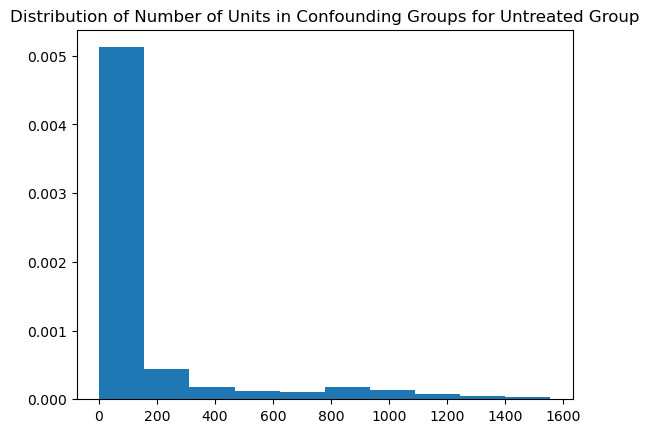

In [63]:
num_test = [num for num in num_treat if num != 0]
num_test = pd.Series(num_test)
plt.hist(num_test, density = True)
plt.title("Distribution of Number of Units in Confounding Groups for Untreated Group")

In [64]:
num_test.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1      2.0
0.2      4.0
0.3      7.0
0.4     13.0
0.5     26.0
0.6     56.0
0.7    101.0
0.8    161.0
0.9    561.0
dtype: float64

Text(0.5, 1.0, 'Distribution of Number of Units in Confounding Groups for Treated Group')

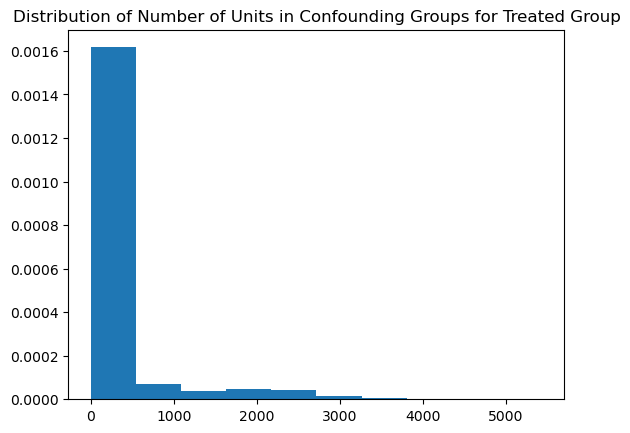

In [65]:
num_test_2 = [num for num in num_untreat if num != 0]
num_test_2 = pd.Series(num_test_2)
plt.hist(num_test_2, density = True)
plt.title("Distribution of Number of Units in Confounding Groups for Treated Group")

In [66]:
num_test_2.quantile([.1, .2, .3, .4, .5, .6, .7, .8, .9])

0.1      2.0
0.2      5.0
0.3     10.0
0.4     18.0
0.5     32.5
0.6     90.0
0.7    158.2
0.8    250.4
0.9    868.4
dtype: float64

Based on the distribution above, a final condition we have decided to use to select the data is that we have decided to take those treated and untreated confounding groups only within the 10th to 90th percentile of their respective distributions above, so as to avoid overly big and overly small groups. Based on this, the function used to calculate estimated ATE is updated as the following:

In [67]:
def calculate_ate(treatment, untreated):
    #Returns N/A if either the treatment or the untreated group has length 0 (no units have the given confounding conditions)
    #Returns N/A if either the number of units within treatment or the untreated group does not match the condition specified above
    if len(treatment) < 2 or len(treatment) > 561 or len(untreated) < 2 or len(untreated) > 868.4:
        return np.nan
    else: 
        return (sum(treatment["HeartDisease"]) / len(treatment)) - (sum(untreated["HeartDisease"]) / len(untreated))

We then constructed a for loop to go through all possible interations of confounding conditions, omitting data that do not match the conditions we have specified above, and finally performing estimated ATE on the reamining data.

In [68]:
for age in np.sort(data['AgeCategory'].unique()):
    print(age)

18-24
25-29
30-34
35-39
40-44
45-49
50-54
55-59
60-64
65-69
70-74
75-79
80 or older


In [69]:
result = []
num_treat = []
num_untreat = []
for age in np.sort(data['AgeCategory'].unique()):
    temp = []
    for bmi in [1,2,3,4]:
        for smoking in [0,1]:
            for alcohol in [0,1]:
                for diabetic in [0,1]:
                    for asthma in [0,1]:
                        treat_test = return_treatment(bmi = bmi, smoking = smoking, alcohol = alcohol, diabetic = diabetic, asthma = asthma, age = age)
                        untreated_test = return_untreated(bmi = bmi, smoking = smoking, alcohol = alcohol, diabetic = diabetic, asthma = asthma, age = age)
                        temp.append(calculate_ate(treat_test, untreated_test))
                        num_treat.append(len(treat_test))
                        num_untreat.append(len(untreated_test))
    result.append(temp)

In [70]:
d = {'18-24': result[0], '25-29': result[1], '30-34': result[2], '35-39': result[3],
     '40-44': result[4], '45-49': result[5], '50-54': result[6], '55-59': result[7],
     '60-64': result[8], '65-69': result[9], '70-74': result[10], '75-79': result[11],
     '80 or older': result[12]}
df = pd.DataFrame(data=d)
df

,18-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,75-79,80 or older
0,-0.008348,0.019608,0.027778,0.028571,0.009074,-0.036364,0.000000,0.053333,-0.021529,0.081695,0.075000,-0.012200,0.037825
1,0.006435,0.153846,0.000000,0.000000,0.000000,0.000000,-0.285714,0.200000,-0.062500,-0.125000,-0.028846,0.256410,-0.055556
2,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,-0.333333,NaN,-0.200000,0.189394,0.250000,-0.251282
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,NaN,0.500000,0.000000,0.000000,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,0.000000,0.000000,0.055556,0.038462,0.058689,0.145770,0.025211,0.044985,-0.001633,0.016395,0.063193,0.073145,-0.113514
60,0.000000,0.012987,0.000000,0.011635,0.013760,-0.004870,0.045577,0.031773,0.062225,-0.004559,0.037954,0.111664,0.033724
61,0.000000,0.052632,-0.004167,0.088235,-0.037037,0.050000,0.115546,0.097363,0.005263,0.054167,0.188889,0.428571,-0.400000
62,NaN,NaN,0.000000,0.000000,-0.090909,0.150794,0.115090,0.285714,0.131313,0.103896,0.095238,0.083333,-0.238095


Text(0.5, 1.0, 'Distribution of Average Treatment Effect for Confounders of Different Age Groups')

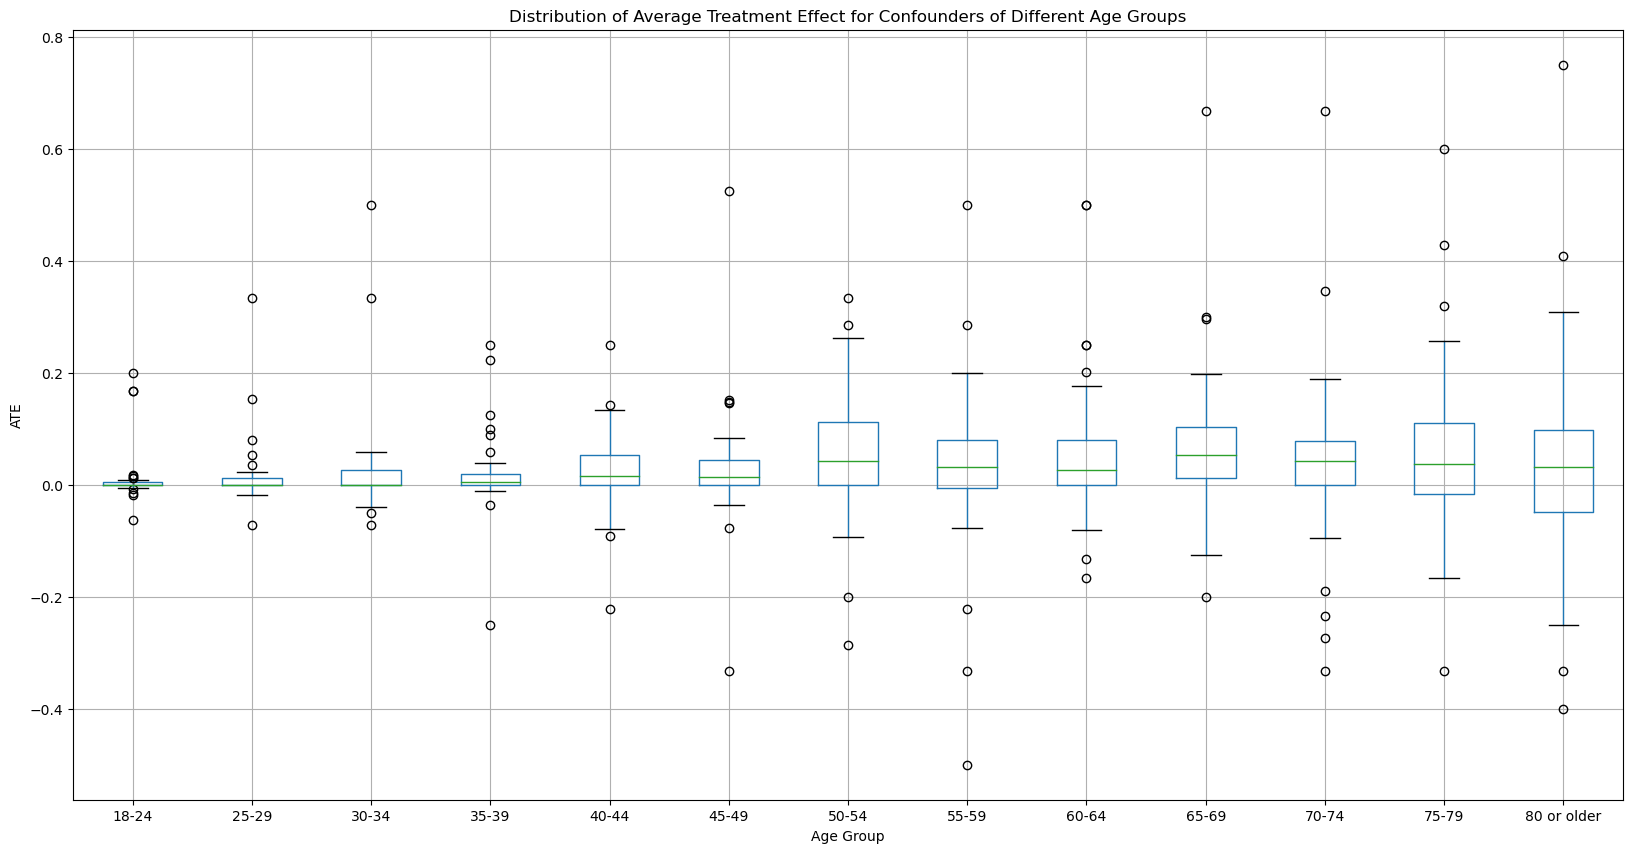

In [71]:
#Using boxplot to visualize the distribution of ATE different age groups given the same set of health conditions.
df.boxplot(figsize=(20, 10))
plt.xlabel("Age Group")
plt.ylabel("ATE")
plt.title("Distribution of Average Treatment Effect for Confounders of Different Age Groups")


From the above figure, it can be seen that there was a general increase in the mean for the distribution of each age group. The spread of the distribution is also increasing, and there is a general increase in the maximum value of estimated ATE attained as the age group increases. That being said, as the spread increase, there seems to be a trend in the increase in negative estimated ATE as well. This shows that as age increase, the likelihood of getting heart disease increase regardless of one's sleep time. However, this does not nullify the causal relationship, as there is a greater increase in positive estimated ATE compared to negative ones.

Limitations:

The limitations of the matching method may come from the dataset being simplified in order to utilize as many units during the matching process as possible. For example, we have recategorized features such as sleep time and BMI from numerical to categorical variables. Such categorization may also have an impact on the final results as different categorizations. Another limitation for the matching process comes from some data being omitted during the process. There are two sources for such omissions. The first one is that we have purposefully omitted the confounding groups with overly big and overly small units inside them, based on the distribution of the number of people in each group. Another source of omission comes from certain individuals in the treatment/untreated group do not have a matching unit for the same set of confounders, and their cases are excluded from the matching process as a result.